In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
columns = ["zabs", "sigma_z", "b_2016", "sigma_b_2016", "logN_2016", "sigma_logN_2016"]
VD_data = pd.read_csv("VD_2016.txt", delimiter = ' ', names = columns, skiprows = 1)

In [3]:
VD_data

,zabs,sigma_z,b_2016,sigma_b_2016,logN_2016,sigma_logN_2016
0,2.220038,2.000000e-06,7.20,0.30,12.480,0.020
1,2.220242,1.000000e-06,7.30,0.20,12.630,0.010
2,2.220506,8.000000e-07,7.64,0.08,13.502,0.005
3,2.220646,5.000000e-07,5.79,0.05,13.558,0.004
4,2.221070,8.000000e-06,12.50,1.00,12.520,0.040
5,2.221312,1.000000e-06,6.20,0.30,13.190,0.070
6,2.221420,2.000000e-05,11.90,2.20,13.200,0.100
7,2.221608,1.000000e-06,6.50,0.10,13.230,0.020
8,2.328888,9.000000e-06,4.90,0.20,13.100,0.140
9,2.328957,5.000000e-06,5.00,0.50,13.400,0.070


(array([44., 41., 10.,  5.,  1.,  1.,  0.,  0.,  1.,  1.]),
 array([ 2.5 ,  8.38, 14.26, 20.14, 26.02, 31.9 , 37.78, 43.66, 49.54,
        55.42, 61.3 ]),
 <a list of 10 Patch objects>)

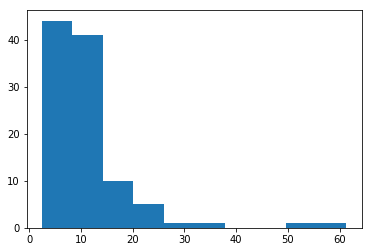

In [4]:
plt.hist(VD_data["b_2016"].values, bins = 10)

(array([ 4.,  7.,  9.,  8.,  9., 13., 12.,  5.,  7., 13.,  7.,  7.,  2.,
         0.,  1.]),
 array([11.26      , 11.46866667, 11.67733333, 11.886     , 12.09466667,
        12.30333333, 12.512     , 12.72066667, 12.92933333, 13.138     ,
        13.34666667, 13.55533333, 13.764     , 13.97266667, 14.18133333,
        14.39      ]),
 <a list of 15 Patch objects>)

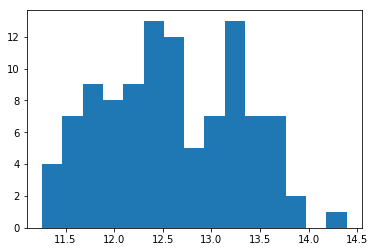

In [5]:
plt.hist(VD_data["logN_2016"], bins = 15)

In [6]:
columns = ["QSO", "Sys", "m_Sys", "Ion", "n_Ion", "z_2013", "e_z_2013",
           "l_W0", "W0_2013", "e_W0_2013", "b_2013", "e_b_2013", "l_logN", "logN_2013", "e_logN_2013"]
VD_data = pd.read_csv("VD_2013.txt", delimiter = '\t', names = columns,
                      comment= "#", na_values=['      ', "NaN","    ","     "])
VD_data

,QSO,Sys,m_Sys,Ion,n_Ion,z_2013,e_z_2013,l_W0,W0_2013,e_W0_2013,b_2013,e_b_2013,l_logN,logN_2013,e_logN_2013
0,J0818+1722,1,,CIV 1548,,4.46298,0.00001,,0.258,0.004,27.3,0.7,,13.90,0.01
1,J0818+1722,1,,CIV 1550,,,,,0.115,0.002,NaN,NaN,,NaN,NaN
2,J0818+1722,2,,CIV 1548,,4.49800,0.00001,,0.054,0.003,11.0,1.0,,13.16,0.02
3,J0818+1722,2,,CIV 1550,b,,,<,0.059,0.003,NaN,NaN,,NaN,NaN
4,J0818+1722,3,,CIV 1548,b,4.50838,0.00004,>,0.045,0.003,31.0,4.0,,13.12,0.03
5,J0818+1722,3,,CIV 1550,,,,,0.039,0.004,NaN,NaN,,NaN,NaN
6,J0818+1722,4,,CIV 1548,,4.52305,0.00004,,0.080,0.006,51.0,4.0,,13.28,0.02
7,J0818+1722,4,,CIV 1550,,,,,0.055,0.004,NaN,NaN,,NaN,NaN
8,J0818+1722,5,,CIV 1548,,4.55225,0.00005,,0.030,0.003,21.0,8.0,,12.78,0.05
9,J0818+1722,5,,CIV 1550,,,,,0.020,0.003,NaN,NaN,,NaN,NaN


Text(0,0.5,'log W$_0$')

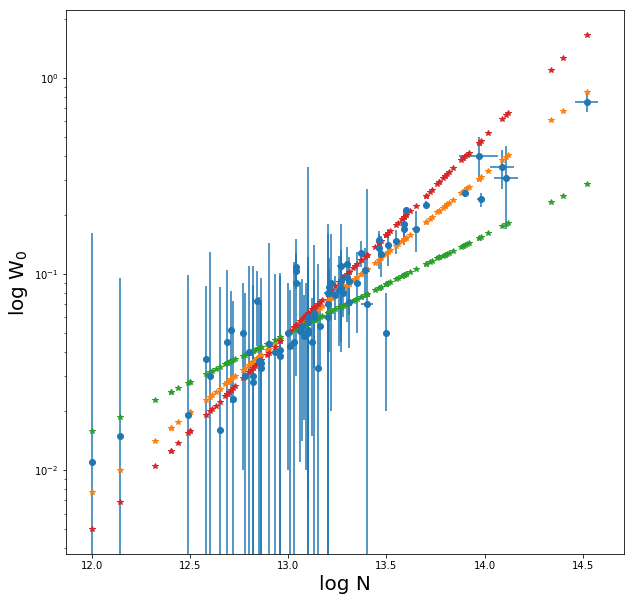

In [7]:
plt.figure(figsize=(10,10))
#plt.plot(VD_data["logN"].values, VD_data["W0"].values, marker = 'o', linestyle = 'None')
plt.errorbar(VD_data["logN_2013"].values, VD_data["W0_2013"].values, VD_data["e_logN_2013"].values, VD_data["e_W0_2013"].values, linestyle = "None", marker = "o")
plt.yscale('log')
w0 = 0.05*(10**(VD_data["logN_2013"].values)/10**(13.0))**(0.81)
w1 = 0.05*(10**(VD_data["logN_2013"].values)/10**(13.0))**(0.5)
w2 = 0.05*(10**(VD_data["logN_2013"].values)/10**(13.0))**(1.)
plt.plot(VD_data["logN_2013"].values, w0, marker = "*", linestyle= "None")
plt.plot(VD_data["logN_2013"].values, w1, marker = "*", linestyle= "None")
plt.plot(VD_data["logN_2013"].values, w2, marker = "*", linestyle= "None")
plt.xlabel("log N", size = 20)
plt.ylabel("log W$_0$", size  = 20)

Text(0.5,0,'log N')

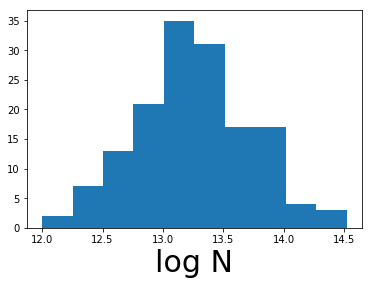

In [8]:
mask_CD_nan = np.isnan(VD_data["logN_2013"].values)
Column_densities = VD_data["logN_2013"].values[~mask_CD_nan]
plt.hist(Column_densities)
plt.xlabel("log N", size =30)

(array([10.,  9., 15., 14.,  5.,  9., 16., 15.,  9.,  3.,  4.,  3.,  8.,
         0.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([ 7.  , 10.48, 13.96, 17.44, 20.92, 24.4 , 27.88, 31.36, 34.84,
        38.32, 41.8 , 45.28, 48.76, 52.24, 55.72, 59.2 , 62.68, 66.16,
        69.64, 73.12, 76.6 , 80.08, 83.56, 87.04, 90.52, 94.  ]),
 <a list of 25 Patch objects>)

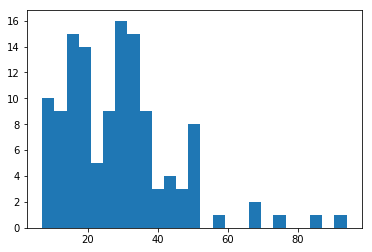

In [9]:
mask_b_nan = np.isnan(VD_data["b_2013"].values)
doppler_param = VD_data["b_2013"].values[~mask_b_nan]
plt.hist(doppler_param, bins= 25)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


Text(0,0.5,'b')

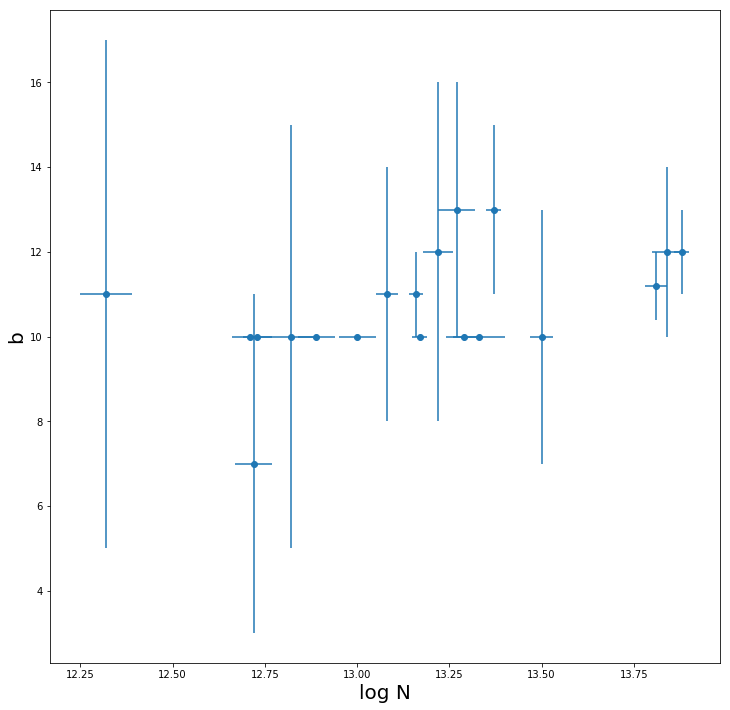

In [10]:
 plt.figure(figsize=(12,12))
# plt.plot(VD_data["logN"].values, VD_data["b"].values, marker = 'o', linestyle = 'None')

#y_kk =VD_data["b"].values
mask_bless10 = VD_data["b_2013"].values <15
y_kk =VD_data["b_2013"].values[mask_bless10]
x_kk = VD_data["logN_2013"].values[mask_bless10]
x_err = VD_data["e_logN_2013"].values[mask_bless10]
y_err =VD_data["e_b_2013"].values[mask_bless10]
plt.errorbar(x_kk, y_kk, xerr = x_err, yerr = y_err, linestyle = "None", marker = "o")
plt.xlabel("log N", size = 20)
plt.ylabel("b", size = 20)

In [11]:
y_kk

array([11. , 11.2, 11. , 10. , 10. , 10. , 13. , 12. , 12. , 10. , 10. ,
        7. , 10. , 10. , 13. , 11. , 10. , 12. , 10. ])

In [14]:
# b^2 = 2*kB*T/m
#m = 1.9944235 × 10^-26 kg
#J kg⋅m2⋅s−2

#kB = 1.380649×10−23 J/K
#[km/s]^2 = T[K]

kB = 1.380649*10**(-23) #J/K
mC = 1.9944235*10**(-26) #kg


Temperatures = 10**(6)*(VD_data["b_2013"].values)**2.*mC/(2.*kB)

Text(0,0.5,'Temperature')

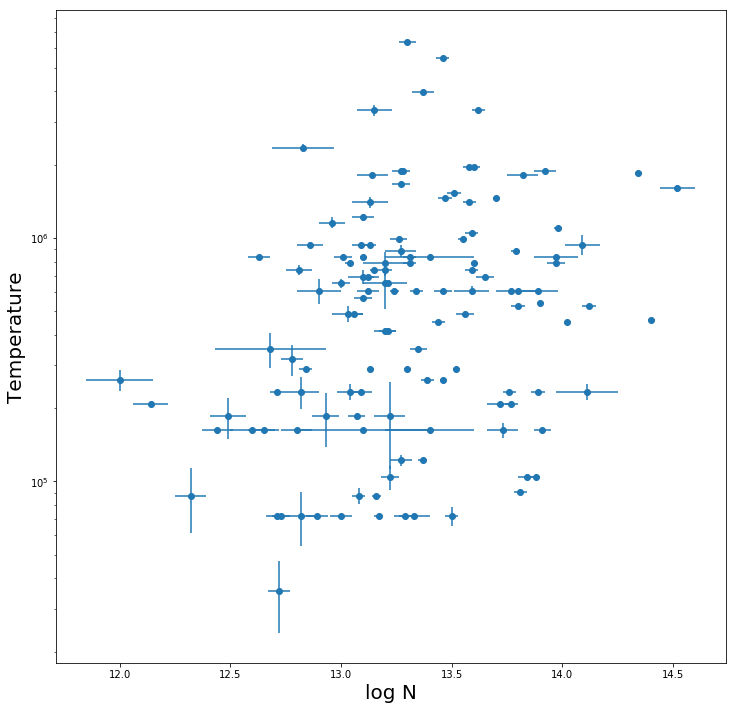

In [25]:
 plt.figure(figsize=(12,12))
# plt.plot(VD_data["logN"].values, VD_data["b"].values, marker = 'o', linestyle = 'None')
x_kk = VD_data["logN_2013"].values
#y_kk =VD_data["b"].values
x_err = VD_data["e_logN_2013"].values
y_err =VD_data["e_b_2013"].values
Temp_err = 10**(6)*(VD_data["e_b_2013"].values)**2.*mC/(2.*kB)
plt.errorbar(x_kk, Temperatures , xerr = x_err, yerr = Temp_err, linestyle = "None", marker = "o")

plt.plot(x_kk, Temperatures, marker = '*', linestyle = "None")
plt.yscale('log')
plt.xlabel("log N", size = 20)
plt.ylabel("Temperature", size = 20)

(array([41., 14., 20., 18.,  9.,  3.,  4.,  3.,  6.,  2.,  1.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.]),
 array([  35391.59898714,  246946.68762662,  458501.77626609,
         670056.86490556,  881611.95354504, 1093167.04218451,
        1304722.13082398, 1516277.21946346, 1727832.30810293,
        1939387.3967424 , 2150942.48538187, 2362497.57402135,
        2574052.66266082, 2785607.75130029, 2997162.83993977,
        3208717.92857924, 3420273.01721871, 3631828.10585819,
        3843383.19449766, 4054938.28313713, 4266493.37177661,
        4478048.46041608, 4689603.54905555, 4901158.63769503,
        5112713.7263345 , 5324268.81497397, 5535823.90361344,
        5747378.99225292, 5958934.08089239, 6170489.16953186,
        6382044.25817134]),
 <a list of 30 Patch objects>)

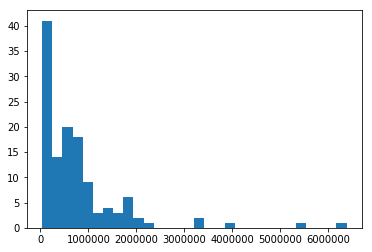

In [16]:
plt.hist(Temperatures[~np.isnan(Temperatures[np.nonzero(Temperatures)])], bins = 30)


# Finding the optical depth $\tau_0$

Text(0,0.5,'W0')

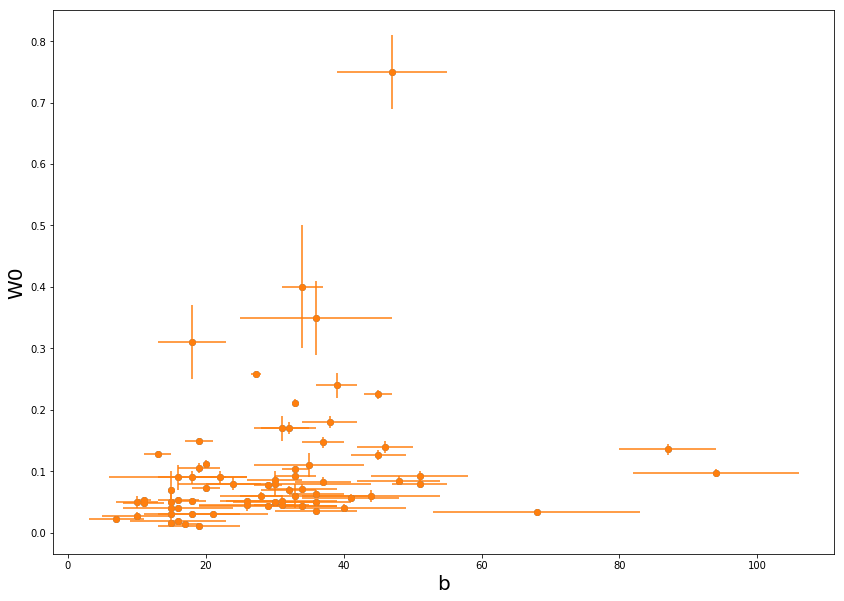

In [17]:
plt.figure(figsize=(14,10))
plt.clf()
mask_b2013_nan = (~np.isnan(VD_data["b_2013"].values))
plt.plot(VD_data["b_2013"].values[mask_b2013_nan],VD_data["W0_2013"].values[mask_b2013_nan], 
         marker = 'o', linestyle = "None")
plt.errorbar(VD_data["b_2013"].values[mask_b2013_nan],VD_data["W0_2013"].values[mask_b2013_nan], 
             xerr = VD_data["e_b_2013"].values[mask_b2013_nan], yerr = VD_data["e_W0_2013"].values[mask_b2013_nan], 
             linestyle = "None", marker = "o")


plt.xlabel("b", size = 20)
plt.ylabel("W0", size = 20)

In [18]:
VD_data["b_2013"].values[mask_b2013_nan]

array([27.3, 11. , 31. , 51. , 21. , 15. , 36. , 30. , 29. , 15. , 18. ,
       45. , 32. , 87. , 26. , 45. , 38. , 37. , 31. , 22. , 33. , 30. ,
       26. , 35. , 16. , 11.2, 11. , 18. , 10. , 29. , 44. , 15. , 40. ,
       26. , 17. , 28. , 18. , 29. , 19. , 52. , 34. , 10. , 10. , 33. ,
       33. , 20. , 20. , 31. , 36. , 94. , 13. , 19. , 30. , 12. , 29. ,
       34. , 34. , 51. , 20. , 47. , 29. , 25.2, 29. , 29. , 50.6, 15. ,
       15. , 15. , 32. , 15. , 16. , 32. , 35. , 25. , 16. , 22. , 12. ,
       50. , 48. , 37. , 51. , 50. , 18. , 10. , 33. , 15. , 27. , 17. ,
       25. , 52. , 10. , 17. , 27. , 41. , 33. , 29. , 36. ,  7. , 34. ,
       10. , 29. , 18. , 68. , 10. , 13. , 74. , 57. , 24. , 32. , 11. ,
       10. , 34. , 36. , 12. , 20. , 10. , 34. , 19. , 68. , 16. , 24. ,
       44. , 46. , 39. , 18. , 18. ])

Text(0.5,1,'F = $\\tau$')

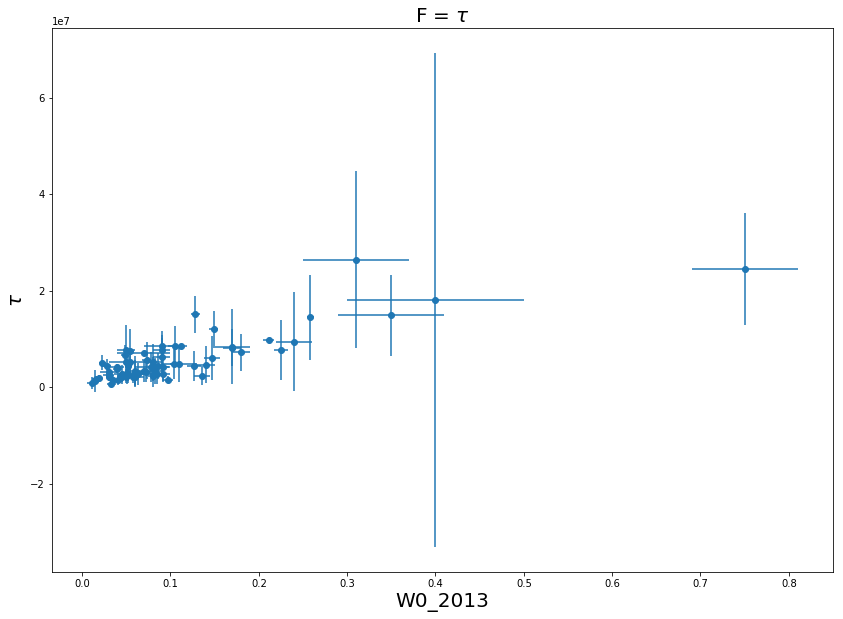

In [23]:
# Case 1 =>. W = 2b\lambda \tau / c
plt.figure(figsize=(14,10))
b_test = 10 #km/s
c_km_p_s = 299792 #Km/s
wavenumber_resonance_CIV = 64483.65 #
wavelength_resonance_CIV = 2.*np.pi/wavenumber_resonance_CIV

tau_0 = VD_data["W0_2013"].values[mask_b2013_nan]* c_km_p_s/2./wavelength_resonance_CIV/VD_data["b_2013"].values[mask_b2013_nan]
e_tau_0 = VD_data["e_W0_2013"].values[mask_b2013_nan]* c_km_p_s/2./wavelength_resonance_CIV/VD_data["e_b_2013"].values[mask_b2013_nan]


plt.errorbar(VD_data["W0_2013"].values[mask_b2013_nan],tau_0, xerr = VD_data["e_W0_2013"].values[mask_b2013_nan], 
             yerr = e_tau_0, marker = 'o', linestyle = "None")
plt.xlabel("W0_2013", size = 20)
plt.ylabel(r"$\tau$", size = 20)
plt.title (r"F = $\tau$", size = 20)
#plt.xlim(0,0.1)

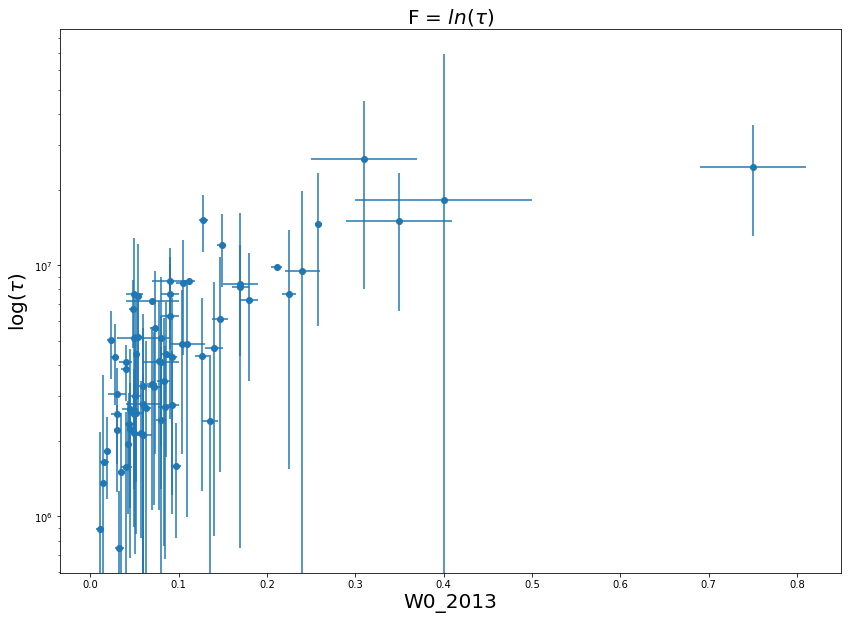

In [20]:
# Case 2 =>. W = 2b\lambda log(\tau) / c
plt.figure(figsize=(14,10))
b_test = 10 #km/s
c_km_p_s = 299792 #Km/s
wavenumber_resonance_CIV = 64483.65 #
wavelength_resonance_CIV = 2.*np.pi/wavenumber_resonance_CIV

tau_0 = (VD_data["W0_2013"].values[mask_b2013_nan]* c_km_p_s/2./wavelength_resonance_CIV/VD_data["b_2013"].values[mask_b2013_nan])
e_tau_0 = (VD_data["e_W0_2013"].values[mask_b2013_nan]* c_km_p_s/2./wavelength_resonance_CIV/VD_data["e_b_2013"].values[mask_b2013_nan])


plt.errorbar(VD_data["W0_2013"].values[mask_b2013_nan],tau_0, xerr = VD_data["e_W0_2013"].values[mask_b2013_nan], 
             yerr = e_tau_0, marker = 'o', linestyle = "None")
plt.xlabel("W0_2013", size = 20)
plt.ylabel(r"log($\tau$)", size = 20)
plt.title (r"F = $ln(\tau)$", size = 20)
plt.yscale("log")

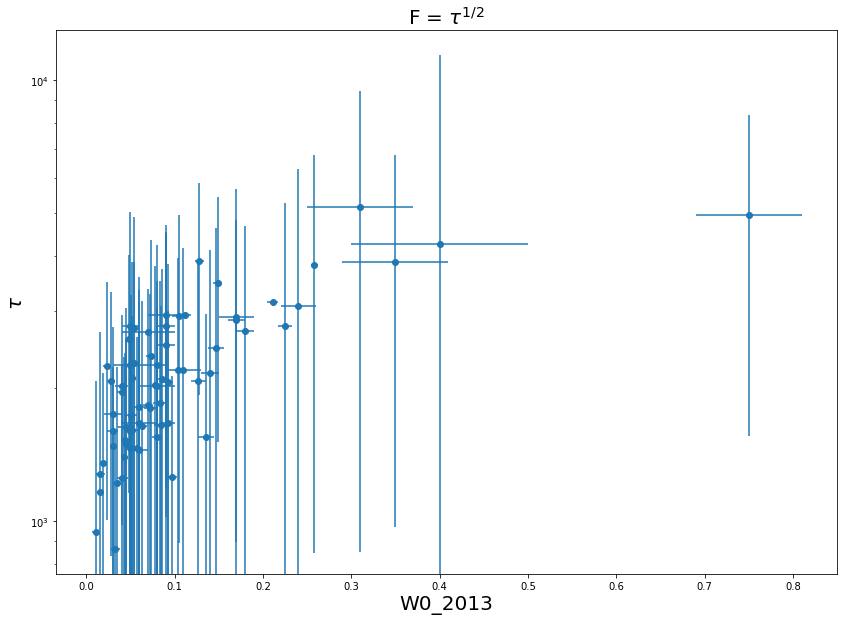

In [21]:
# Case 2 =>. W = 2b\lambda (\tau)^0.5 / c
plt.figure(figsize=(14,10))
b_test = 10 #km/s
c_km_p_s = 299792 #Km/s
wavenumber_resonance_CIV = 64483.65 #
wavelength_resonance_CIV = 2.*np.pi/wavenumber_resonance_CIV

tau_0 = np.sqrt(VD_data["W0_2013"].values[mask_b2013_nan]* c_km_p_s/2./wavelength_resonance_CIV/VD_data["b_2013"].values[mask_b2013_nan])
e_tau_0 = np.sqrt(VD_data["e_W0_2013"].values[mask_b2013_nan]* c_km_p_s/2./wavelength_resonance_CIV/VD_data["e_b_2013"].values[mask_b2013_nan])


plt.errorbar(VD_data["W0_2013"].values[mask_b2013_nan],tau_0, xerr = VD_data["e_W0_2013"].values[mask_b2013_nan], 
             yerr = e_tau_0, marker = 'o', linestyle = "None")
plt.xlabel("W0_2013", size = 20)
plt.ylabel(r"$\tau$", size = 20)
plt.title (r"F = $\tau^{1/2}$", size = 20)
plt.yscale("log")